In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

# importing libraries

In [0]:
import numpy as np
np.random.seed(42)
import tensorflow.compat.v1 as tf
tf.set_random_seed(42)
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import sys
import heapq
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 5

# Loading data

In [20]:
path = '/content/drive/My Drive/Colab Notebooks/search/pg2680.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 417932


# Processing 

In [0]:
#text = '''Text messaging is most often used between private mobile phone users, as a substitute for voice calls in situations where voice communication is impossible or undesirable (e.g., during a school class or a work meeting). Texting is also used to communicate very brief messages, such as informing someone that you will be late or reminding a friend or colleague about a meeting. As with e-mail, informality and brevity have become an accepted part of text messaging. Some text messages such as SMS can also be used for the remote controlling of home appliances. It is widely used in domotics systems. Some amateurs have also built own systems to control (some of) their appliances via SMS.[16][17] Other methods such as group messaging, which was patented in 2012 by the GM of Andrew Ferry, Devin Peterson, Justin Cowart, Ian Ainsworth, Patrick Messinger, Jacob Delk, Jack Grande, Austin Hughes, Brendan Blake, and Brooks Brasher are used to involve more than two people into a text messaging conversation[citation needed]. A Flash SMS is a type[18] of text message that appears directly on the main screen without user interaction and is not automatically stored in the inbox. It can be useful in cases such as an emergency (e.g., fire alarm) or confidentiality (e.g., one-time password).[19] Short message services are developing very rapidly throughout the world. SMS is particularly popular in Europe, Asia (excluding Japan; see below), United States, Australia and New Zealand and is also gaining influence in Africa. Popularity has grown to a sufficient extent that the term texting (used as a verb meaning the act of mobile phone users sending short messages back and forth) has entered the common lexicon. Young Asians consider SMS as the most popular mobile phone application.[20] Fifty percent of American teens send fifty text messages or more per day, making it their most frequent form of communication.[21] In China, SMS is very popular and has brought service providers significant profit (18 billion short messages were sent in 2001).[22] It is a very influential and powerful tool in the Philippines, where the average user sends 10–12 text messages a day. The Philippines alone sends on average over 1 billion text messages a day,[23] more than the annual average SMS volume of the countries in Europe, and even China and India. SMS is hugely popular in India, where youngsters often exchange lots of text messages, and companies provide alerts, infotainment, news, cricket scores updates, railway/airline booking, mobile billing, and banking services on SMS. Texting became popular in the Philippines in 1998. Similarly, in 2008, text messaging played a primary role in the implication of former Detroit Mayor Kwame Kilpatrick in an SMS sex scandal.[24] Short messages are particularly popular among young urbanites. In many markets, the service is comparatively cheap. For example, in Australia, a message typically costs between A$0.20 and $0.25 to send (some prepaid services charge $0.01 between their own phones), compared with a voice call, which costs somewhere between $0.40 and $2.00 per minute (commonly charged in half-minute blocks). The service is enormously profitable to the service providers. At a typical length of only 190 bytes (including protocol overhead), more than 350 of these messages per minute can be transmitted at the same data rate as a usual voice call (9 kbit/s). There are also free SMS services available, which are often sponsored, that allow sending[25] and receiving[26] SMS from a PC connected to the internet. Mobile service providers in New Zealand, such as Vodafone and Telecom NZ, provide up to 2000 SMS messages for NZ$10 per month. Users on these plans send on average 1500 SMS messages every month. Text messaging has become so popular that advertising agencies and advertisers are now jumping into the text messaging business. Services that provide bulk text message sending are also becoming a popular way for clubs, associations, and advertisers to reach a group of opt-in subscribers quickly. Research suggests that Internet-based mobile messaging will have grown to equal the popularity of SMS in 2013, with nearly 10 trillion messages being sent through each technology.[27][28] Services such as Facebook Messenger, Snapchat, WhatsApp and Viber have led to a decline in the use of SMS in parts of the world. Research has shown that women are more likely than men to use emoticons in text messages.[29]. The electrical telegraph systems, developed in the early 19th century, used simple electrical signals to send text messages. In the late 19th century, the wireless telegraphy was developed using radio waves. In 1933, the German Reichspost (Reich postal service) introduced the first "telex" service.[2][3] The University of Hawaii began using radio to send digital information as early as 1971, using ALOHAnet.[citation needed] Friedhelm Hillebrand conceptualised SMS in 1984 while working for Deutsche Telekom. Sitting at a typewriter at home, Hillebrand typed out random sentences and counted every letter, number, punctuation, and space. Almost every time, the messages contained fewer than 160 characters, thus giving the basis for the limit one could type via text messaging.[4] With Bernard Ghillebaert of France Télécom, he developed a proposal for the GSM (Groupe Spécial Mobile) meeting in February 1985 in Oslo.[5] The first technical solution evolved in a GSM subgroup under the leadership of Finn Trosby. It was further developed under the leadership of Kevin Holley and Ian Harris (see Short Message Service).[6] SMS forms an integral part of SS7 (Signalling System No. 7).[7] Under SS7, it is a "state" with a 160 character data, coded in the ITU-T "T.56" text format, that has a "sequence lead in" to determine different language codes, and may have special character codes that permit, for example, sending simple graphs as text. This was part of ISDN (Integrated Services Digital Network) and since GSM is based on this, made its way to the mobile phone. Messages could be sent and received on ISDN phones, and these can send SMS to any GSM phone. The possibility of doing something is one thing, implementing it another, but systems existed from 1988 that sent SMS messages to mobile phones[citation needed] (compare ND-NOTIS). SMS messaging was used for the first time on 3 December 1992,[8] when Neil Papworth, a 22-year-old test engineer for Sema Group in the UK[9] (now Airwide Solutions),[10] used a personal computer to send the text message "Merry Christmas" via the Vodafone network to the phone of Richard Jarvis,[11][12] who was at a party in Newbury, Berkshire, which had been organised to celebrate the event. Modern SMS text messaging is[by whom?] usually messaging from one mobile phone to another. Finnish Radiolinja became the first network to offer a commercial person-to-person SMS text messaging service in 1994. When Radiolinja's domestic competitor, Telecom Finland (now part of TeliaSonera) also launched SMS text messaging in 1995 and the two networks offered cross-network SMS functionality, Finland became the first nation where SMS text messaging was offered on a competitive as well as on a commercial basis. GSM was allowed[by whom?] in the United States and the radio frequencies were blocked and awarded to US "Carriers" to use US technology. Hence there is no "development" in the US in mobile messaging service. The GSM in the US had to use a frequency allocated for private communication services (PCS) – what the ITU frequency régime had blocked for DECT – Digital Enhanced Cordless Telecommunications – 1000-feet range picocell, but survived. American Personal Communications (APC), the first GSM carrier in America, provided the first text-messaging service in the United States. Sprint Telecommunications Venture, a partnership of Sprint Corp. and three large cable-TV companies, owned 49 percent of APC. The Sprint venture was the largest single buyer at a government-run spectrum auction that raised $7.7 billion in 2005 for PCS licenses. APC operated under the brand name of Sprint Spectrum and launched its service on November 15, 1995 in Washington, D.C. and in Baltimore, Maryland. Vice President Al Gore in Washington, D.C. made the initial phone-call to launch the network, calling Mayor Kurt Schmoke in Baltimore.[13] Initial growth of text messaging[where?] was slow, with customers in 1995 sending on average only 0.4 message per GSM customer per month.[14] One factor in the slow take-up of SMS was that operators were slow to set up charging systems, especially for prepaid subscribers, and to eliminate billing fraud, which was possible by changing SMSC settings on individual handsets to use the SMSCs of other operators.[citation needed] Over time, this issue was eliminated by switch-billing instead of billing at the SMSC and by new features within SMSCs to allow blocking of foreign mobile users sending messages through it.[citation needed] SMS is available on a wide range of networks, including 3G networks. However, not all text-messaging systems use SMS; some notable alternate implementations of the concept include J-Phone's SkyMail and NTT Docomo's Short Mail, both in Japan. E-mail messaging from phones, as popularized by NTT Docomo's i-mode and the RIM BlackBerry, also typically use standard mail protocols such as SMTP over TCP/IP.[15] As of 2007 text messaging was the most widely used mobile data service, with 74% of all mobile phone users worldwide, or 2.4 billion out of 3.3 billion phone subscribers, at the end of 2007 being active users of the Short Message Service. In countries such as Finland, Sweden and Norway, over 85% of the population use SMS. The European average is about 80%, and North America is rapidly catching up with over 60% active users of SMS by end of 2008.[citation needed] The largest average usage of the service by mobile phone subscribers occurs in the Philippines, with an average of 27 texts sent per day per subscriber.[citation needed]. Text messaging, or texting, is the act of composing and sending electronic messages, typically consisting of alphabetic and numeric characters, between two or more users of mobile devices, desktops/laptops, or other type of compatible computer. Text messages may be sent over a cellular network, or may also be sent via an Internet connection. The term originally referred to messages sent using the Short Message Service (SMS). It has grown beyond alphanumeric text to include multimedia messages (known as MMS) containing digital images, videos, and sound content, as well as ideograms known as emoji (happy faces, sad faces, and other icons). Text messages are used for personal, family, business and social purposes. Governmental and non-governmental organizations use text messaging for communication between colleagues. In the 2010s, the sending of short informal messages has become an accepted part of many cultures, as happened earlier with emailing.[1] This makes texting a quick and easy way to communicate with friends, family and colleagues, including in contexts where a call would be impolite or inappropriate (e.g., calling very late at night or when one knows the other person is busy with family or work activities). Like e-mail and voicemail, and unlike calls (in which the caller hopes to speak directly with the recipient), texting does not require the caller and recipient to both be free at the same moment; this permits communication even between busy individuals. Text messages can also be used to interact with automated systems, for example, to order products or services from e-commerce websites, or to participate in online contests. Advertisers and service providers use direct text marketing to send messages to mobile users about promotions, payment due dates, and other notifications instead of using postal mail, email, or voicemail.. Today, financial service providers have access to many rich data sources. The data-centric hedge funds rely heavily on AI to develop more advanced trading models. The systems started to think like the marketplace and discover new trends on the go. Because AI, in essence, replaces humans and their decision making and effectively decreases the human errors, as well as emotional reactions that can be devastating in the trading process. For example, Hong Kong’s Aidiya identifies and executes trends, by using multiple forms of AI. With each new AI innovation, after analyzing market prices, macroeconomic and microeconomic data, AI engines make their own forecasts and are able to choose the best approach in a given situation.'''

In [22]:
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print(f'unique chars: {len(chars)}')

unique chars: 63


# Sequence

In [23]:
SEQUENCE_LENGTH = 3
step = 1
sentences = []
next_chars = []
for i in range(0, len(text) - SEQUENCE_LENGTH, step):
    sentences.append(text[i: i + SEQUENCE_LENGTH])
    next_chars.append(text[i + SEQUENCE_LENGTH])
print(f'num training examples: {len(sentences)}')

num training examples: 417929


In [0]:
X = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [25]:
sentences[3]

'e p'

In [26]:
next_chars[3]

'r'

In [27]:
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [28]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [29]:
X.shape

(417929, 3, 63)

In [30]:
y.shape

(417929, 63)

# Building the model

In [0]:
model = Sequential()
model.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

# Training

In [32]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.01, batch_size=128, epochs=10, shuffle=True).history

Train on 413749 samples, validate on 4180 samples
Epoch 1/10
413749/413749 [==============================] - 46s 110us/step - loss: 1.8082 - acc: 0.4650 - val_loss: 2.1224 - val_acc: 0.4239
Epoch 2/10
413749/413749 [==============================] - 47s 114us/step - loss: 1.6396 - acc: 0.5021 - val_loss: 2.1301 - val_acc: 0.4368
Epoch 3/10
413749/413749 [==============================] - 48s 116us/step - loss: 1.6124 - acc: 0.5077 - val_loss: 2.1271 - val_acc: 0.4201
Epoch 4/10
413749/413749 [==============================] - 48s 115us/step - loss: 1.5993 - acc: 0.5097 - val_loss: 2.1200 - val_acc: 0.4299
Epoch 5/10
413749/413749 [==============================] - 46s 112us/step - loss: 1.5915 - acc: 0.5114 - val_loss: 2.0936 - val_acc: 0.4354
Epoch 6/10
413749/413749 [==============================] - 46s 112us/step - loss: 1.5878 - acc: 0.5124 - val_loss: 2.1200 - val_acc: 0.4287
Epoch 7/10
413749/413749 [==============================] - 46s 112us/step - loss: 1.5852 - acc: 0.5134 

# Saving

In [0]:
model.save('keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

In [0]:
model = load_model('keras_model.h5')
history = pickle.load(open("history.p", "rb"))

# Evaluation

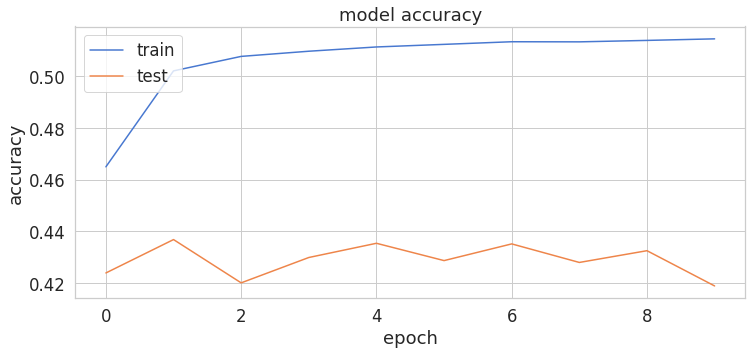

In [38]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

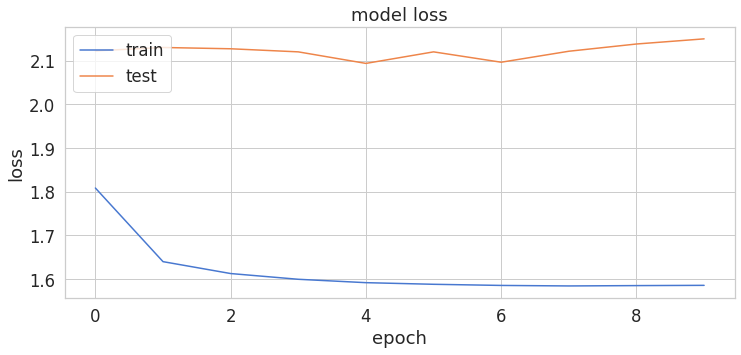

In [39]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

# Test the model

prepare the input

In [0]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1
        
    return x

In [41]:
prepare_input("Thi".lower())

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [0]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [0]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [0]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [0]:
quotes = [
    "Tec",
    "Tha",
    "fro",
    "tho",
    "wit"
]

In [46]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

tec
['tionsider ', 'hed ', 'k ', 'ut ', 'curies ']

tha
['t ', 'n ', 'st ', 'll ', 'cgries ']

fro
['m ', 'nten ', ' and ', 'le ', '\nand ']

tho
['u ', 'se ', 'rse ', 'd ', 'm ']

wit
['he ', 'ed ', ' is ', 'ness ', 'fully ']

